## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  20.035861   432.479291  0.248757  3.405468  1.722525
1  99.086695   466.238259  0.990372  4.140042  1.391132
2  11.970282   636.165692  0.603022  9.297169  1.605996
3  55.438416  1181.159339  0.359477  3.027142  1.460237
4   6.804073  1276.906470  0.857957  1.511104  1.554501


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8722171	total: 60.7ms	remaining: 1m
1:	learn: 0.8654385	total: 61.3ms	remaining: 30.6s
2:	learn: 0.8575892	total: 61.8ms	remaining: 20.5s
3:	learn: 0.8500607	total: 62.1ms	remaining: 15.5s
4:	learn: 0.8419606	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8349581	total: 63.1ms	remaining: 10.4s
6:	learn: 0.8265600	total: 63.6ms	remaining: 9.02s
7:	learn: 0.8181452	total: 64.1ms	remaining: 7.94s
8:	learn: 0.8111320	total: 64.5ms	remaining: 7.1s
9:	learn: 0.8028954	total: 64.9ms	remaining: 6.43s
10:	learn: 0.7944798	total: 65.4ms	remaining: 5.88s
11:	learn: 0.7876099	total: 65.8ms	remaining: 5.42s
12:	learn: 0.7779252	total: 66.2ms	remaining: 5.03s
13:	learn: 0.7707103	total: 66.6ms	remaining: 4.69s
14:	learn: 0.7643241	total: 66.9ms	remaining: 4.4s
15:	learn: 0.7547271	total: 67.4ms	remaining: 4.14s
16:	learn: 0.7492696	total: 67.8ms	remaining: 3.92s
17:	learn: 0.7439017	total: 68.3ms	remaining: 3.72s
18:	learn: 0.7374575	total: 68.8ms	remaining: 3.5

109:	learn: 0.3702800	total: 109ms	remaining: 881ms
110:	learn: 0.3679779	total: 110ms	remaining: 878ms
111:	learn: 0.3658438	total: 110ms	remaining: 873ms
112:	learn: 0.3638795	total: 110ms	remaining: 867ms
113:	learn: 0.3620097	total: 111ms	remaining: 862ms
114:	learn: 0.3599203	total: 111ms	remaining: 856ms
115:	learn: 0.3577811	total: 111ms	remaining: 849ms
116:	learn: 0.3554852	total: 112ms	remaining: 843ms
117:	learn: 0.3535909	total: 112ms	remaining: 837ms
118:	learn: 0.3513392	total: 112ms	remaining: 833ms
119:	learn: 0.3491286	total: 113ms	remaining: 828ms
120:	learn: 0.3472774	total: 113ms	remaining: 823ms
121:	learn: 0.3452212	total: 114ms	remaining: 818ms
122:	learn: 0.3430230	total: 114ms	remaining: 814ms
123:	learn: 0.3413694	total: 114ms	remaining: 808ms
124:	learn: 0.3392001	total: 115ms	remaining: 804ms
125:	learn: 0.3375457	total: 115ms	remaining: 800ms
126:	learn: 0.3360874	total: 116ms	remaining: 796ms
127:	learn: 0.3341515	total: 116ms	remaining: 791ms
128:	learn: 

281:	learn: 0.1788085	total: 186ms	remaining: 474ms
282:	learn: 0.1780309	total: 187ms	remaining: 473ms
283:	learn: 0.1773085	total: 187ms	remaining: 472ms
284:	learn: 0.1768109	total: 188ms	remaining: 471ms
285:	learn: 0.1764415	total: 188ms	remaining: 470ms
286:	learn: 0.1757623	total: 189ms	remaining: 468ms
287:	learn: 0.1754572	total: 189ms	remaining: 467ms
288:	learn: 0.1752177	total: 189ms	remaining: 466ms
289:	learn: 0.1749628	total: 190ms	remaining: 464ms
290:	learn: 0.1743619	total: 190ms	remaining: 463ms
291:	learn: 0.1741694	total: 191ms	remaining: 462ms
292:	learn: 0.1736892	total: 191ms	remaining: 461ms
293:	learn: 0.1730447	total: 191ms	remaining: 460ms
294:	learn: 0.1724044	total: 192ms	remaining: 459ms
295:	learn: 0.1718943	total: 192ms	remaining: 457ms
296:	learn: 0.1714655	total: 193ms	remaining: 456ms
297:	learn: 0.1710521	total: 193ms	remaining: 455ms
298:	learn: 0.1707116	total: 194ms	remaining: 454ms
299:	learn: 0.1702448	total: 194ms	remaining: 452ms
300:	learn: 

521:	learn: 0.0845906	total: 291ms	remaining: 267ms
522:	learn: 0.0843951	total: 292ms	remaining: 266ms
523:	learn: 0.0841851	total: 292ms	remaining: 265ms
524:	learn: 0.0838878	total: 293ms	remaining: 265ms
525:	learn: 0.0838196	total: 293ms	remaining: 264ms
526:	learn: 0.0834707	total: 294ms	remaining: 264ms
527:	learn: 0.0832798	total: 294ms	remaining: 263ms
528:	learn: 0.0829657	total: 294ms	remaining: 262ms
529:	learn: 0.0826284	total: 295ms	remaining: 261ms
530:	learn: 0.0824746	total: 295ms	remaining: 261ms
531:	learn: 0.0822256	total: 296ms	remaining: 260ms
532:	learn: 0.0819451	total: 296ms	remaining: 259ms
533:	learn: 0.0817938	total: 296ms	remaining: 259ms
534:	learn: 0.0815940	total: 297ms	remaining: 258ms
535:	learn: 0.0813030	total: 297ms	remaining: 257ms
536:	learn: 0.0810162	total: 298ms	remaining: 257ms
537:	learn: 0.0806955	total: 298ms	remaining: 256ms
538:	learn: 0.0806262	total: 299ms	remaining: 255ms
539:	learn: 0.0804433	total: 299ms	remaining: 255ms
540:	learn: 

694:	learn: 0.0508281	total: 369ms	remaining: 162ms
695:	learn: 0.0507522	total: 369ms	remaining: 161ms
696:	learn: 0.0505406	total: 369ms	remaining: 161ms
697:	learn: 0.0503237	total: 370ms	remaining: 160ms
698:	learn: 0.0501571	total: 370ms	remaining: 159ms
699:	learn: 0.0499511	total: 371ms	remaining: 159ms
700:	learn: 0.0497121	total: 371ms	remaining: 158ms
701:	learn: 0.0496391	total: 371ms	remaining: 158ms
702:	learn: 0.0493957	total: 372ms	remaining: 157ms
703:	learn: 0.0491880	total: 372ms	remaining: 157ms
704:	learn: 0.0490267	total: 373ms	remaining: 156ms
705:	learn: 0.0487956	total: 373ms	remaining: 155ms
706:	learn: 0.0487248	total: 373ms	remaining: 155ms
707:	learn: 0.0484666	total: 374ms	remaining: 154ms
708:	learn: 0.0482957	total: 374ms	remaining: 154ms
709:	learn: 0.0481170	total: 375ms	remaining: 153ms
710:	learn: 0.0479616	total: 375ms	remaining: 152ms
711:	learn: 0.0477391	total: 376ms	remaining: 152ms
712:	learn: 0.0476693	total: 376ms	remaining: 151ms
713:	learn: 

932:	learn: 0.0268327	total: 473ms	remaining: 34ms
933:	learn: 0.0268171	total: 473ms	remaining: 33.4ms
934:	learn: 0.0267943	total: 474ms	remaining: 32.9ms
935:	learn: 0.0267305	total: 474ms	remaining: 32.4ms
936:	learn: 0.0266719	total: 475ms	remaining: 31.9ms
937:	learn: 0.0266454	total: 475ms	remaining: 31.4ms
938:	learn: 0.0265826	total: 476ms	remaining: 30.9ms
939:	learn: 0.0265481	total: 476ms	remaining: 30.4ms
940:	learn: 0.0264674	total: 476ms	remaining: 29.9ms
941:	learn: 0.0264524	total: 477ms	remaining: 29.4ms
942:	learn: 0.0263766	total: 477ms	remaining: 28.8ms
943:	learn: 0.0262854	total: 478ms	remaining: 28.3ms
944:	learn: 0.0262353	total: 478ms	remaining: 27.8ms
945:	learn: 0.0261786	total: 479ms	remaining: 27.3ms
946:	learn: 0.0261331	total: 479ms	remaining: 26.8ms
947:	learn: 0.0260997	total: 480ms	remaining: 26.3ms
948:	learn: 0.0260740	total: 480ms	remaining: 25.8ms
949:	learn: 0.0260188	total: 481ms	remaining: 25.3ms
950:	learn: 0.0259709	total: 481ms	remaining: 24

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

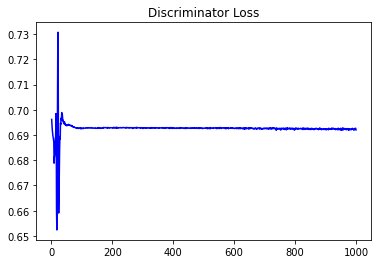

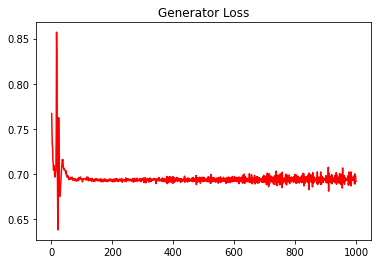

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.8709671371739967


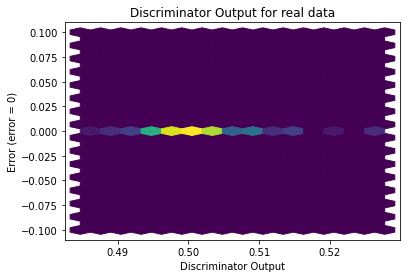

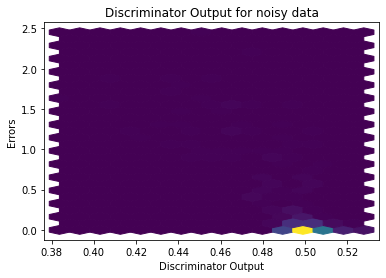

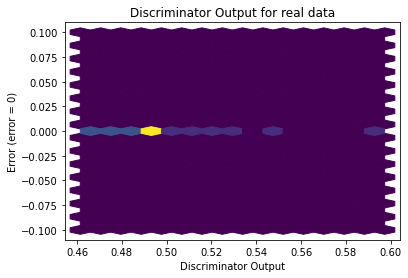

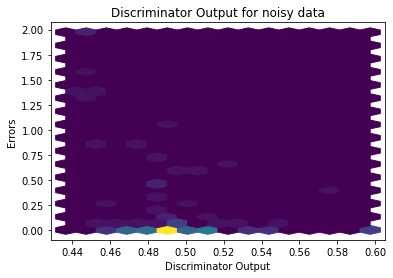

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


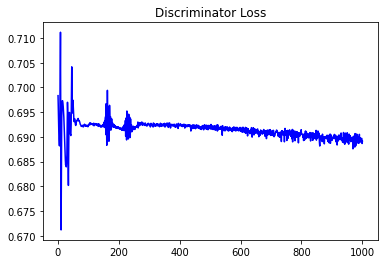

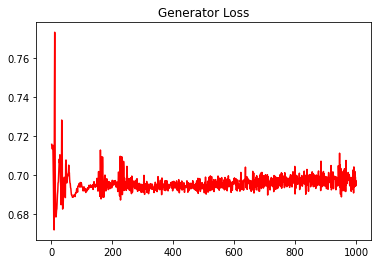

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7294421599337123


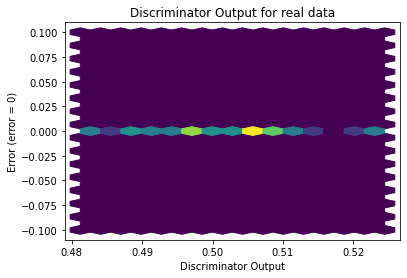

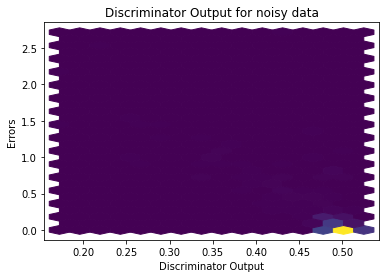

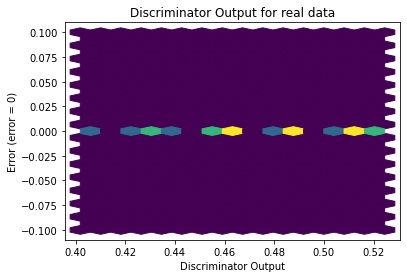

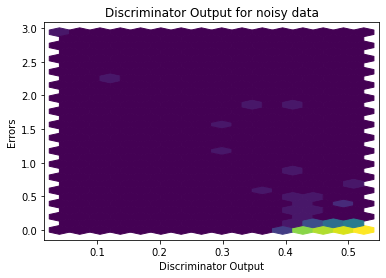

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5207]], requires_grad=True)
